# SPAM DETECTION USING NLP

# SMS Spam Collection Data Set

## Data Set Information:

This corpus has been collected from free or free for research sources at the Internet:

-> A collection of 425 SMS spam messages was manually extracted from the Grumbletext Web site. This is a UK forum in which cell phone users make public claims about SMS spam messages, most of them without reporting the very spam message received. The identification of the text of spam messages in the claims is a very hard and time-consuming task, and it involved carefully scanning hundreds of web pages. The Grumbletext Web site is: [Web Link].
-> A subset of 3,375 SMS randomly chosen ham messages of the NUS SMS Corpus (NSC), which is a dataset of about 10,000 legitimate messages collected for research at the Department of Computer Science at the National University of Singapore. The messages largely originate from Singaporeans and mostly from students attending the University. These messages were collected from volunteers who were made aware that their contributions were going to be made publicly available. The NUS SMS Corpus is avalaible at: [Web Link].
-> A list of 450 SMS ham messages collected from Caroline Tag's PhD Thesis available at [Web Link].
-> Finally, we have incorporated the SMS Spam Corpus v.0.1 Big. It has 1,002 SMS ham messages and 322 spam messages and it is public available at: [Web Link]. This corpus has been used in the following academic researches:

[1] GÃ³mez Hidalgo, J.M., Cajigas Bringas, G., Puertas Sanz, E., Carrero GarcÃ­a, F. Content Based SMS Spam Filtering. Proceedings of the 2006 ACM Symposium on Document Engineering (ACM DOCENG'06), Amsterdam, The Netherlands, 10-13, 2006.

[2] Cormack, G. V., GÃ³mez Hidalgo, J. M., and Puertas SÃ¡nz, E. Feature engineering for mobile (SMS) spam filtering. Proceedings of the 30th Annual international ACM Conference on Research and Development in information Retrieval (ACM SIGIR'07), New York, NY, 871-872, 2007.

[3] Cormack, G. V., GÃ³mez Hidalgo, J. M., and Puertas SÃ¡nz, E. Spam filtering for short messages. Proceedings of the 16th ACM Conference on Information and Knowledge Management (ACM CIKM'07). Lisbon, Portugal, 313-320, 2007.


## Attribute Information:

The collection is composed by just one text file, where each line has the correct class followed by the raw message. We offer some examples bellow:

ham What you doing?how are you?
ham Ok lar... Joking wif u oni...
ham dun say so early hor... U c already then say...
ham MY NO. IN LUTON 0125698789 RING ME IF UR AROUND! H*
ham Siva is in hostel aha:-.
ham Cos i was out shopping wif darren jus now n i called him 2 ask wat present he wan lor. Then he started guessing who i was wif n he finally guessed darren lor.
spam FreeMsg: Txt: CALL to No: 86888 & claim your reward of 3 hours talk time to use from your phone now! ubscribe6GBP/ mnth inc 3hrs 16 stop?txtStop
spam Sunshine Quiz! Win a super Sony DVD recorder if you canname the capital of Australia? Text MQUIZ to 82277. B
spam URGENT! Your Mobile No 07808726822 was awarded a L2,000 Bonus Caller Prize on 02/09/03! This is our 2nd attempt to contact YOU! Call 0871-872-9758 BOX95QU

Note: the messages are not chronologically sorted.

# IMPORTING REQUIRED LIBRARIES AND LOADING CSV FILE

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mlt
import seaborn as se

In [3]:
# Reading the csv file
msg = pd.read_csv("Data/SMSSpamCollection",sep="\t",names=["Type","Message"])
msg.head()

,Type,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# EXPLORATORY DATA ANALYSIS

In [4]:
msg.head()

,Type,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
msg.shape

(5572, 2)

### There are total 5572 messages in which some are ham and some are spam

In [6]:
msg["Type"].value_counts()

ham     4825
spam     747
Name: Type, dtype: int64

### We observe that out of 5572 messages 4825 are ham and 747 are spam.

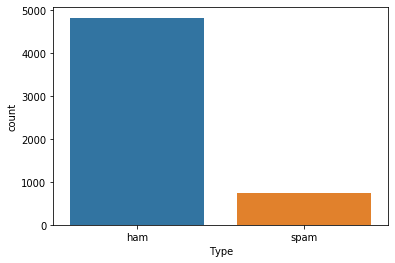

In [7]:
se.countplot(x="Type",data=msg)

### From graph we can say that very less messages recieved are spam

#### Now to create a word cloud for spams

In [8]:
from wordcloud import WordCloud,STOPWORDS 

In [9]:
# A dataframe comprising only of spam data
msg_spam = msg.loc[msg['Type']=='spam', :]
msg_spam.head()

,Type,Message
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."


In [10]:
msg_spam['Type'].value_counts()

spam    747
Name: Type, dtype: int64

#### We have separated 747 spam messages from the main dataframe

In [11]:
msg_spam = msg.loc[msg['Type'] == 'spam', :]

# Removing spaces
spam_words = ' '.join(msg_spam['Message'])

# Removing unnecessary parts like web links and @
clean_spam_word = " ".join([word for word in spam_words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                            ])
clean_spam_word

'Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C\'s apply 08452810075over18\'s FreeMsg Hey there darling it\'s been 3 week\'s now and no word back! I\'d like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only. Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030 SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info URGENT! You have won a 1 week FREE membership in our £100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18 XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message o

In [12]:
# Making a word Cloud
spam_wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=1600,
                      height=900
                     ).generate(clean_spam_word)

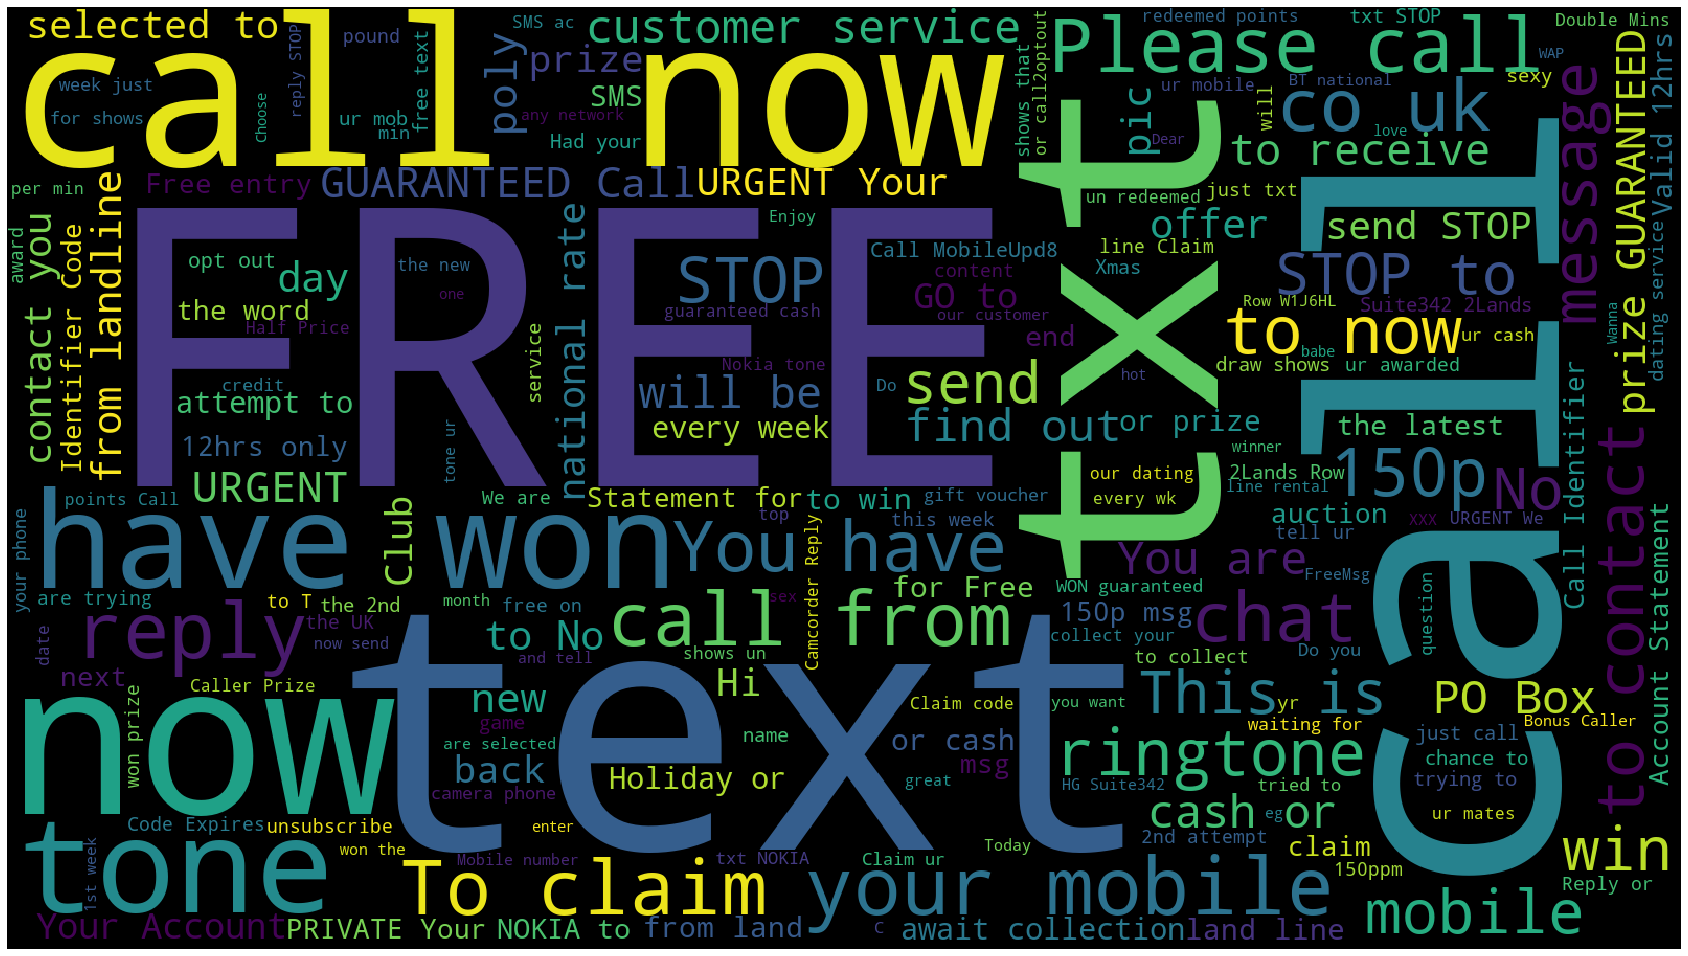

In [13]:
mlt.figure(1,figsize=(30,30))
mlt.imshow(spam_wordcloud)
mlt.axis('off')
mlt.show()

### From the above picture we can say that spam messages comprise of words like free,text,call now etc.

# DATA PREPROCESSING
- Remove special characters
- Conversion to lowercase
- Tokenization
- Lemmatization

In [14]:
# Importing required libraries for data preprocessing
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

In [15]:
# Initialising Lemmatizer
spam_lemma = WordNetLemmatizer()

In [16]:
clean_spam = []
spam_len = []

In [17]:
# Function to preprocess spam data to remove unnecessary parts and bring it in a standard form(kind of)
def preprocess(spam_in):
    # Removing special characters and digits
    letters_only = re.sub("[^a-zA-Z]", " ",spam_in)
    
    # change sentence to lower case
    letters_only = letters_only.lower()

    # tokenize into words
    words = letters_only.split()
    
    # remove stop words                
    words = [w for w in words if not w in stopwords.words("english")]
    
    #Lemmatization
    words = [spam_lemma.lemmatize(word) for word in words]
    
    clean_spam.append(" ".join(words))
    
    spam_len.append(len(words))

In [18]:
%%time
clean_spam = []
spam_len = []
msg['Message'].apply(lambda x: preprocess(x))
msg['Lemmatized Spam'] = clean_spam
msg['Spam Length'] = spam_len

Wall time: 20.3 s


In [19]:
# Dataframe after lemmatization
msg.head()

,Type,Message,Lemmatized Spam,Spam Length
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,16
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...,21
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say,9
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think go usf life around though,7


# DATA PREPARATION

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
cov = CountVectorizer(analyzer="word")
X = cov.fit_transform(msg["Lemmatized Spam"])

In [21]:
print(cov.get_feature_names())

['aa', 'aah', 'aaniye', 'aaooooright', 'aathi', 'ab', 'abbey', 'abdomen', 'abeg', 'abel', 'aberdeen', 'abi', 'ability', 'abiola', 'abj', 'able', 'abnormally', 'aboutas', 'abroad', 'absence', 'absolutely', 'absolutly', 'abstract', 'abt', 'abta', 'aburo', 'abuse', 'abuser', 'ac', 'academic', 'acc', 'accent', 'accenture', 'accept', 'access', 'accessible', 'accidant', 'accident', 'accidentally', 'accommodation', 'accommodationvouchers', 'accomodate', 'accomodations', 'accordin', 'accordingly', 'account', 'accounting', 'accumulation', 'achan', 'ache', 'achieve', 'acid', 'acknowledgement', 'acl', 'acnt', 'aco', 'across', 'act', 'acted', 'actin', 'acting', 'action', 'activ', 'activate', 'active', 'activity', 'actor', 'actual', 'actually', 'ad', 'adam', 'add', 'addamsfa', 'added', 'addicted', 'addie', 'adding', 'address', 'adewale', 'adi', 'adjustable', 'admin', 'administrator', 'admirer', 'admission', 'admit', 'adore', 'adoring', 'adp', 'adress', 'adrian', 'adrink', 'adsense', 'adult', 'advan

In [22]:
#List of vectorised features
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [23]:
# Array of vectorised data
print(X)

  (0, 2472)	1
  (0, 3198)	1
  (0, 4593)	1
  (0, 1337)	1
  (0, 431)	1
  (0, 826)	1
  (0, 2545)	1
  (0, 6935)	1
  (0, 3311)	1
  (0, 824)	1
  (0, 1087)	1
  (0, 2508)	1
  (0, 210)	1
  (0, 6741)	1
  (1, 4226)	1
  (1, 3340)	1
  (1, 3168)	1
  (1, 6848)	1
  (1, 4252)	1
  (2, 2293)	1
  (2, 1912)	2
  (2, 6898)	1
  (2, 1193)	1
  (2, 6859)	1
  (2, 2042)	2
  :	:
  (5567, 813)	1
  (5567, 3805)	1
  (5567, 1802)	1
  (5568, 2783)	1
  (5568, 2479)	1
  (5568, 2280)	1
  (5568, 1942)	1
  (5569, 3882)	1
  (5569, 5939)	1
  (5569, 4538)	1
  (5570, 2293)	1
  (5570, 6783)	1
  (5570, 3433)	1
  (5570, 4071)	1
  (5570, 5651)	1
  (5570, 1856)	1
  (5570, 2396)	1
  (5570, 856)	1
  (5570, 2597)	1
  (5570, 3026)	1
  (5570, 58)	1
  (5570, 649)	1
  (5571, 3989)	1
  (5571, 6398)	1
  (5571, 5147)	1


In [24]:
X.shape

(5572, 7098)

#### New vectorized data has 5572 row's and 8176 column's

#### Converting categorical data into  numerical data (Type column)

In [25]:
# Dataframe after Vectotrization
msg.head()

,Type,Message,Lemmatized Spam,Spam Length
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,16
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...,21
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say,9
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think go usf life around though,7


In [26]:
# To convert categorical data into numerical data
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
msg["Type"] = l.fit_transform(msg["Type"])

In [27]:
msg.head()

,Type,Message,Lemmatized Spam,Spam Length
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,16
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...,21
3,0,U dun say so early hor... U c already then say...,u dun say early hor u c already say,9
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think go usf life around though,7


# Modelling

In [28]:
# Splitting the train and test data.
from sklearn.model_selection import train_test_split
m_train,m_test,l_train,l_test = train_test_split(X.toarray(),msg.Type,test_size = 0.25,random_state=10)

In [29]:
# Importing libraries for required models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [30]:
# dictionary of Models
logi = LogisticRegression()
dt = DecisionTreeClassifier()
sv = SVC(probability = True)
classifiers = ['LogisticRegression', 'DecisionTreeClassifier', 'SVC']
models = {logi: 'LogisticRegression', 
          dt: 'DecisionTreeClassifier', 
          sv: 'SVC'}

In [31]:
# Function to print accuracy measures of different models
def performance(algo, name, X_test, y_test, y_test_pred):
    # Accuracy Score
    score = accuracy_score(y_test, y_test_pred)
    print('Accuracy score for', name, ':', score)
    
    # Confusion Metrics
    se.heatmap(confusion_matrix(y_test, y_test_pred), annot=True)
    mlt.title("Confusion Matrix")
    mlt.show()
    
    # Classification Report
    print(classification_report(y_test, y_test_pred))

######################################## LogisticRegression ########################################
Accuracy score for LogisticRegression : 0.9705671213208902


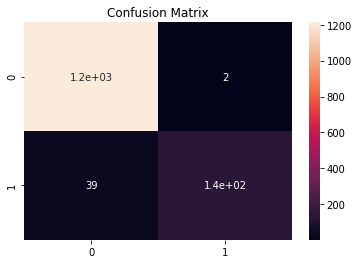

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1215
           1       0.99      0.78      0.87       178

    accuracy                           0.97      1393
   macro avg       0.98      0.89      0.93      1393
weighted avg       0.97      0.97      0.97      1393

######################################## DecisionTreeClassifier ########################################
Accuracy score for DecisionTreeClassifier : 0.9626704953338119


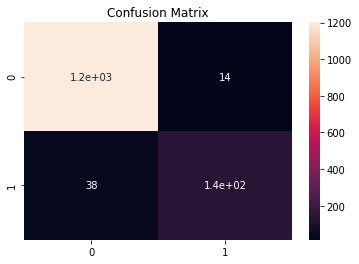

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1215
           1       0.91      0.79      0.84       178

    accuracy                           0.96      1393
   macro avg       0.94      0.89      0.91      1393
weighted avg       0.96      0.96      0.96      1393

######################################## SVC ########################################
Accuracy score for SVC : 0.9676956209619526


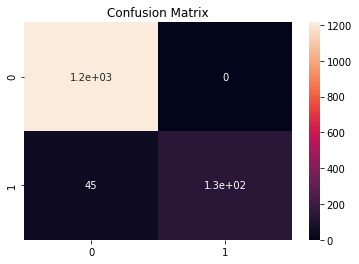

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1215
           1       1.00      0.75      0.86       178

    accuracy                           0.97      1393
   macro avg       0.98      0.87      0.92      1393
weighted avg       0.97      0.97      0.97      1393



In [34]:
# Evaluating models 
acc = {"algo":[],"accuracy_score":[]}
for algo, name in models.items():
    print('#'*40, name, '#'*40)
    fit = algo.fit(m_train,l_train)
    pred = fit.predict(m_test)
    performance(algo, name, m_test, l_test, pred)
    acc["algo"].append(name)
    acc["accuracy_score"].append(accuracy_score(l_test,pred))

# Accuracy of models

In [35]:
acc = pd.DataFrame(acc)
acc

,algo,accuracy_score
0,LogisticRegression,0.970567
1,DecisionTreeClassifier,0.962670
2,SVC,0.967696


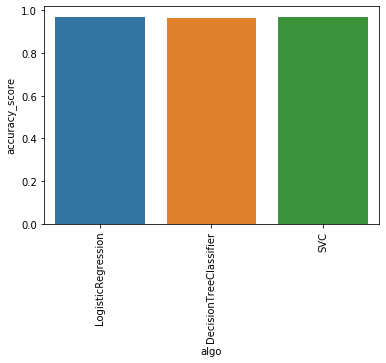

In [36]:
se.barplot(x=acc["algo"],y=acc["accuracy_score"])
mlt.xticks(rotation=90)
mlt.show()

# Conclusion

# From the above graph and table we conclude that for given data set for NLP Logistic Regression performs the best with 97% accuracy